**Elaborado por:**

- Juan Esteban Olaya García - 20171020135

- Xiomara Valentina Gutierrez Mora - 20191025079

- Arthur David Sanchez Lopez - 20171020073


In [ ]:
# install the requirements
!pip install spacy
!python -m spacy download es_core_news_md
!python -m spacy download en_core_web_md
!pip install spacytextblob
!python -m textblob.download_corpora
#!pip install tweepy
#!pip install tweepy[async]
!git clone https://github.com/tweepy/tweepy.git
!cd tweepy
!pip install
!pip install git+https://github.com/tweepy/tweepy.git 
!pip install -q wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42.3 MB 1.1 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 33.5 MB 1.2 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Do

### Importamos las librerias

In [ ]:
import wordcloud
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
import io
import unicodedata
import numpy as np
import re
import string
import tweepy 
import spacy
plt.style.use('fivethirtyeight')
from spacy.lang.es.stop_words import STOP_WORDS
from spacytextblob.spacytextblob import SpacyTextBlob

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### Credenciales de la cuenta de desarrollador 

In [ ]:
consumerKey = 'QqKaqjzpg3pVoQ0Fz6KUxQeSg'
consumerSecret = 'MkLEmH1NeQlUbaW3MLq74v76BThNAI71abshKrTnfNifF0ethq'
accessToken = '1543014097263988736-KP7RQWDJNAhSEOm6wazBXwcjdBsMRa'
accessTokenSecret = 'OoS9nlHYh9A0PAfywGKvgRT933BOuVhBXyWDh347clH83'
bearerToken = 'AAAAAAAAAAAAAAAAAAAAAOiTeQEAAAAAVXyCy7XotfETqWRpofOVN5kq5FQ%3DqrY3RQb6UtmfXnFaULZeIT49WYA8OmVda2PoVf9SnK8yLiHhE2'

In [ ]:
nlp = spacy.load("es_core_news_md")
nlp.add_pipe("spacytextblob")

### Creamos nuestro cliente y recuperamos los tweets

In [ ]:
Client = tweepy.Client(bearer_token=bearerToken, consumer_key=consumerKey, 
consumer_secret=consumerSecret, access_token=accessToken, 
access_token_secret=accessTokenSecret, 
wait_on_rate_limit=True)

query = '( celular 📱 OR computador 💻) -is:retweet lang:es'


tweets= Client.search_recent_tweets(query=query, max_results=100)  ##obteniendo los tweets
stop_words = stopwords.words('spanish')


### Creamos el dataframe con los tweets recuperados

In [ ]:
data = pd.DataFrame()  #creando data frame
data['Tweet']=[tweet.text for tweet in tweets.data]  #añadiendo los twits al data frame en el columna Tweet
data

,Tweet
0,"@Keypo Te saluda Angie. 👋🏻 Inténtalo desde un computador 💻 y varios navegadores, si no lo logras, envíanos una image..."
1,Lleva por lo menos tres cargadores🔌\n\nEmpaca dos cargadores para tu celular📱 uno que se quede en la habitación del ...
2,"😁 ¡Humildad ante todo! \n\n📲 Riyad Mahrez, gana millones en el @ManCity, pero el estado de su celular causó sensació..."
3,Últimamente tengo tantos teclazos en lo que escribo en el celular. ¿Mis dedos crecieron? ¿Las teclas en el celular s...
4,"📱 A través del buzón de voz de tu teléfono celular, personas malintencionadas podrían robar tu información. \nSigue ..."
...,...
95,Casa en Condominio residencial en Renta en zona 14\n PAC-010-03-22 \n📱 Celular: 502-5413-8957\n📧Correo:a.arriaza@cit...
96,¿Te gustaría recibir las noticias más importantes en tu celular? 📱Únete a nuestro canal de #Telegram y se parte de l...
97,Apartamento en Renta en el corazón de la Zona 4\n PAA-023-04-21-9 \n📱 Celular: 502-5413-6957\n📧Correo:c.porras@citym...
98,- Paga fácilmente el parquímetro desde tu celular.🚙 \nDescarga Mueve Ciudad.📱\n👉🏻 https://t.co/vz5C2dMH7j https://t....


### Tokenizamos el tweet

In [ ]:
def tokenizar(txt):
    txt=word_tokenize(txt)
    return txt
data['Token']=data['Tweet'].apply(lambda x: tokenizar(x))
data.head(10)

,Tweet,Token
0,"@Keypo Te saluda Angie. 👋🏻 Inténtalo desde un computador 💻 y varios navegadores, si no lo logras, envíanos una image...","[@, Keypo, Te, saluda, Angie, ., 👋🏻, Inténtalo, desde, un, computador, 💻, y, varios, navegadores, ,, si, no, lo, log..."
1,Lleva por lo menos tres cargadores🔌\n\nEmpaca dos cargadores para tu celular📱 uno que se quede en la habitación del ...,"[Lleva, por, lo, menos, tres, cargadores🔌, Empaca, dos, cargadores, para, tu, celular📱, uno, que, se, quede, en, la,..."
2,"😁 ¡Humildad ante todo! \n\n📲 Riyad Mahrez, gana millones en el @ManCity, pero el estado de su celular causó sensació...","[😁, ¡Humildad, ante, todo, !, 📲, Riyad, Mahrez, ,, gana, millones, en, el, @, ManCity, ,, pero, el, estado, de, su, ..."
3,Últimamente tengo tantos teclazos en lo que escribo en el celular. ¿Mis dedos crecieron? ¿Las teclas en el celular s...,"[Últimamente, tengo, tantos, teclazos, en, lo, que, escribo, en, el, celular, ., ¿Mis, dedos, crecieron, ?, ¿Las, te..."
4,"📱 A través del buzón de voz de tu teléfono celular, personas malintencionadas podrían robar tu información. \nSigue ...","[📱, A, través, del, buzón, de, voz, de, tu, teléfono, celular, ,, personas, malintencionadas, podrían, robar, tu, in..."
5,Evite utilizar el celular al conducir. El atender el celular 📱distrae nuestra atención provocando accidentes. #Oaxa...,"[Evite, utilizar, el, celular, al, conducir, ., El, atender, el, celular, 📱distrae, nuestra, atención, provocando, a..."
6,@Alerta_News_ Esto pasa todos los días así como un robo de celular 📱 en Latinoamérica,"[@, Alerta_News_, Esto, pasa, todos, los, días, así, como, un, robo, de, celular, 📱, en, Latinoamérica]"
7,"Hilo de las fotos más sexys, que tengan en su celular.📱 \n(No importa de quien)\nComienzo yo.😈\nRT’s a las mejores f...","[Hilo, de, las, fotos, más, sexys, ,, que, tengan, en, su, celular.📱, (, No, importa, de, quien, ), Comienzo, yo.😈, ..."
8,#LoMásVisto | 💻🔍DuckDuckGo es un buscador de información con mayor seguridad. En 2018 alcanzó 30 millones de búsqued...,"[#, LoMásVisto, |, 💻🔍DuckDuckGo, es, un, buscador, de, información, con, mayor, seguridad, ., En, 2018, alcanzó, 30,..."
9,"Lo ➕ Leído de la semana en Entérate Cali 📱💬📢\nPatricia Ariza, futura ministra de cultura en el gobierno de Petro pro...","[Lo, ➕, Leído, de, la, semana, en, Entérate, Cali, 📱💬📢, Patricia, Ariza, ,, futura, ministra, de, cultura, en, el, g..."


### Convertimos a minúscula 

In [ ]:
def Minimizar(txt):
    txt=[w.lower() for w in txt]
    return txt
data['Minimizar']=data['Token'].apply(lambda x: Minimizar(x))
data.head(10)

,Tweet,Token,Minimizar
0,"@Keypo Te saluda Angie. 👋🏻 Inténtalo desde un computador 💻 y varios navegadores, si no lo logras, envíanos una image...","[@, Keypo, Te, saluda, Angie, ., 👋🏻, Inténtalo, desde, un, computador, 💻, y, varios, navegadores, ,, si, no, lo, log...","[@, keypo, te, saluda, angie, ., 👋🏻, inténtalo, desde, un, computador, 💻, y, varios, navegadores, ,, si, no, lo, log..."
1,Lleva por lo menos tres cargadores🔌\n\nEmpaca dos cargadores para tu celular📱 uno que se quede en la habitación del ...,"[Lleva, por, lo, menos, tres, cargadores🔌, Empaca, dos, cargadores, para, tu, celular📱, uno, que, se, quede, en, la,...","[lleva, por, lo, menos, tres, cargadores🔌, empaca, dos, cargadores, para, tu, celular📱, uno, que, se, quede, en, la,..."
2,"😁 ¡Humildad ante todo! \n\n📲 Riyad Mahrez, gana millones en el @ManCity, pero el estado de su celular causó sensació...","[😁, ¡Humildad, ante, todo, !, 📲, Riyad, Mahrez, ,, gana, millones, en, el, @, ManCity, ,, pero, el, estado, de, su, ...","[😁, ¡humildad, ante, todo, !, 📲, riyad, mahrez, ,, gana, millones, en, el, @, mancity, ,, pero, el, estado, de, su, ..."
3,Últimamente tengo tantos teclazos en lo que escribo en el celular. ¿Mis dedos crecieron? ¿Las teclas en el celular s...,"[Últimamente, tengo, tantos, teclazos, en, lo, que, escribo, en, el, celular, ., ¿Mis, dedos, crecieron, ?, ¿Las, te...","[últimamente, tengo, tantos, teclazos, en, lo, que, escribo, en, el, celular, ., ¿mis, dedos, crecieron, ?, ¿las, te..."
4,"📱 A través del buzón de voz de tu teléfono celular, personas malintencionadas podrían robar tu información. \nSigue ...","[📱, A, través, del, buzón, de, voz, de, tu, teléfono, celular, ,, personas, malintencionadas, podrían, robar, tu, in...","[📱, a, través, del, buzón, de, voz, de, tu, teléfono, celular, ,, personas, malintencionadas, podrían, robar, tu, in..."
5,Evite utilizar el celular al conducir. El atender el celular 📱distrae nuestra atención provocando accidentes. #Oaxa...,"[Evite, utilizar, el, celular, al, conducir, ., El, atender, el, celular, 📱distrae, nuestra, atención, provocando, a...","[evite, utilizar, el, celular, al, conducir, ., el, atender, el, celular, 📱distrae, nuestra, atención, provocando, a..."
6,@Alerta_News_ Esto pasa todos los días así como un robo de celular 📱 en Latinoamérica,"[@, Alerta_News_, Esto, pasa, todos, los, días, así, como, un, robo, de, celular, 📱, en, Latinoamérica]","[@, alerta_news_, esto, pasa, todos, los, días, así, como, un, robo, de, celular, 📱, en, latinoamérica]"
7,"Hilo de las fotos más sexys, que tengan en su celular.📱 \n(No importa de quien)\nComienzo yo.😈\nRT’s a las mejores f...","[Hilo, de, las, fotos, más, sexys, ,, que, tengan, en, su, celular.📱, (, No, importa, de, quien, ), Comienzo, yo.😈, ...","[hilo, de, las, fotos, más, sexys, ,, que, tengan, en, su, celular.📱, (, no, importa, de, quien, ), comienzo, yo.😈, ..."
8,#LoMásVisto | 💻🔍DuckDuckGo es un buscador de información con mayor seguridad. En 2018 alcanzó 30 millones de búsqued...,"[#, LoMásVisto, |, 💻🔍DuckDuckGo, es, un, buscador, de, información, con, mayor, seguridad, ., En, 2018, alcanzó, 30,...","[#, lomásvisto, |, 💻🔍duckduckgo, es, un, buscador, de, información, con, mayor, seguridad, ., en, 2018, alcanzó, 30,..."
9,"Lo ➕ Leído de la semana en Entérate Cali 📱💬📢\nPatricia Ariza, futura ministra de cultura en el gobierno de Petro pro...","[Lo, ➕, Leído, de, la, semana, en, Entérate, Cali, 📱💬📢, Patricia, Ariza, ,, futura, ministra, de, cultura, en, el, g...","[lo, ➕, leído, de, la, semana, en, entérate, cali, 📱💬📢, patricia, ariza, ,, futura, ministra, de, cultura, en, el, g..."


### Hallamos palabras reservadas del tweet

In [ ]:
def StopWords(txt):
    txt=[w for w in txt if w in stop_words]
    return txt
data['Palabras_Reservadas']=data['Minimizar'].apply(lambda x: StopWords(x))
data.head(10)

,Tweet,Token,Minimizar,Palabras_Reservadas
0,"@Keypo Te saluda Angie. 👋🏻 Inténtalo desde un computador 💻 y varios navegadores, si no lo logras, envíanos una image...","[@, Keypo, Te, saluda, Angie, ., 👋🏻, Inténtalo, desde, un, computador, 💻, y, varios, navegadores, ,, si, no, lo, log...","[@, keypo, te, saluda, angie, ., 👋🏻, inténtalo, desde, un, computador, 💻, y, varios, navegadores, ,, si, no, lo, log...","[te, desde, un, y, no, lo, una, de, lo, que, te]"
1,Lleva por lo menos tres cargadores🔌\n\nEmpaca dos cargadores para tu celular📱 uno que se quede en la habitación del ...,"[Lleva, por, lo, menos, tres, cargadores🔌, Empaca, dos, cargadores, para, tu, celular📱, uno, que, se, quede, en, la,...","[lleva, por, lo, menos, tres, cargadores🔌, empaca, dos, cargadores, para, tu, celular📱, uno, que, se, quede, en, la,...","[por, lo, para, tu, uno, que, se, en, la, del, y, otro, que, con, tu, tu, es, para, la]"
2,"😁 ¡Humildad ante todo! \n\n📲 Riyad Mahrez, gana millones en el @ManCity, pero el estado de su celular causó sensació...","[😁, ¡Humildad, ante, todo, !, 📲, Riyad, Mahrez, ,, gana, millones, en, el, @, ManCity, ,, pero, el, estado, de, su, ...","[😁, ¡humildad, ante, todo, !, 📲, riyad, mahrez, ,, gana, millones, en, el, @, mancity, ,, pero, el, estado, de, su, ...","[ante, todo, en, el, pero, el, estado, de, su, en, por, qué]"
3,Últimamente tengo tantos teclazos en lo que escribo en el celular. ¿Mis dedos crecieron? ¿Las teclas en el celular s...,"[Últimamente, tengo, tantos, teclazos, en, lo, que, escribo, en, el, celular, ., ¿Mis, dedos, crecieron, ?, ¿Las, te...","[últimamente, tengo, tantos, teclazos, en, lo, que, escribo, en, el, celular, ., ¿mis, dedos, crecieron, ?, ¿las, te...","[tengo, en, lo, que, en, el, en, el, son, más, no, pero, ya, estoy, algo]"
4,"📱 A través del buzón de voz de tu teléfono celular, personas malintencionadas podrían robar tu información. \nSigue ...","[📱, A, través, del, buzón, de, voz, de, tu, teléfono, celular, ,, personas, malintencionadas, podrían, robar, tu, in...","[📱, a, través, del, buzón, de, voz, de, tu, teléfono, celular, ,, personas, malintencionadas, podrían, robar, tu, in...","[a, del, de, de, tu, tu, estas]"
5,Evite utilizar el celular al conducir. El atender el celular 📱distrae nuestra atención provocando accidentes. #Oaxa...,"[Evite, utilizar, el, celular, al, conducir, ., El, atender, el, celular, 📱distrae, nuestra, atención, provocando, a...","[evite, utilizar, el, celular, al, conducir, ., el, atender, el, celular, 📱distrae, nuestra, atención, provocando, a...","[el, al, el, el, nuestra, la, la, y, todos]"
6,@Alerta_News_ Esto pasa todos los días así como un robo de celular 📱 en Latinoamérica,"[@, Alerta_News_, Esto, pasa, todos, los, días, así, como, un, robo, de, celular, 📱, en, Latinoamérica]","[@, alerta_news_, esto, pasa, todos, los, días, así, como, un, robo, de, celular, 📱, en, latinoamérica]","[esto, todos, los, como, un, de, en]"
7,"Hilo de las fotos más sexys, que tengan en su celular.📱 \n(No importa de quien)\nComienzo yo.😈\nRT’s a las mejores f...","[Hilo, de, las, fotos, más, sexys, ,, que, tengan, en, su, celular.📱, (, No, importa, de, quien, ), Comienzo, yo.😈, ...","[hilo, de, las, fotos, más, sexys, ,, que, tengan, en, su, celular.📱, (, no, importa, de, quien, ), comienzo, yo.😈, ...","[de, las, más, que, tengan, en, su, no, de, quien, a, las]"
8,#LoMásVisto | 💻🔍DuckDuckGo es un buscador de información con mayor seguridad. En 2018 alcanzó 30 millones de búsqued...,"[#, LoMásVisto, |, 💻🔍DuckDuckGo, es, un, buscador, de, información, con, mayor, seguridad, ., En, 2018, alcanzó, 30,...","[#, lomásvisto, |, 💻🔍duckduckgo, es, un, buscador, de, información, con, mayor, seguridad, ., en, 2018, alcanzó, 30,...","[es, un, de, con, en, de, el, es, a, y, se, en, el, o, en, el, te]"
9,"Lo ➕ Leído de la semana en Entérate Cali 📱💬📢\nPatricia Ariza, futura ministra de cultura en el gobierno de Petro pro...","[Lo, ➕, Leído, de, la, semana, en, Entérate, Cali, 📱💬📢, Patricia, Ar

### Tweet sin palabras reservadas

In [ ]:
def NoStopWords(txt):
    txt=[w for w in txt if w not in stop_words]
    return txt
data['TweetNoStopWords']=data['Minimizar'].apply(lambda x: NoStopWords(x))
data.head(10)

,Tweet,Token,Minimizar,Palabras_Reservadas,TweetNoStopWords
0,"@Keypo Te saluda Angie. 👋🏻 Inténtalo desde un computador 💻 y varios navegadores, si no lo logras, envíanos una image...","[@, Keypo, Te, saluda, Angie, ., 👋🏻, Inténtalo, desde, un, computador, 💻, y, varios, navegadores, ,, si, no, lo, log...","[@, keypo, te, saluda, angie, ., 👋🏻, inténtalo, desde, un, computador, 💻, y, varios, navegadores, ,, si, no, lo, log...","[te, desde, un, y, no, lo, una, de, lo, que, te]","[@, keypo, saluda, angie, ., 👋🏻, inténtalo, computador, 💻, varios, navegadores, ,, si, logras, ,, envíanos, imagen, ..."
1,Lleva por lo menos tres cargadores🔌\n\nEmpaca dos cargadores para tu celular📱 uno que se quede en la habitación del ...,"[Lleva, por, lo, menos, tres, cargadores🔌, Empaca, dos, cargadores, para, tu, celular📱, uno, que, se, quede, en, la,...","[lleva, por, lo, menos, tres, cargadores🔌, empaca, dos, cargadores, para, tu, celular📱, uno, que, se, quede, en, la,...","[por, lo, para, tu, uno, que, se, en, la, del, y, otro, que, con, tu, tu, es, para, la]","[lleva, menos, tres, cargadores🔌, empaca, dos, cargadores, celular📱, quede, habitación, hotel, lleves, junto, baterí..."
2,"😁 ¡Humildad ante todo! \n\n📲 Riyad Mahrez, gana millones en el @ManCity, pero el estado de su celular causó sensació...","[😁, ¡Humildad, ante, todo, !, 📲, Riyad, Mahrez, ,, gana, millones, en, el, @, ManCity, ,, pero, el, estado, de, su, ...","[😁, ¡humildad, ante, todo, !, 📲, riyad, mahrez, ,, gana, millones, en, el, @, mancity, ,, pero, el, estado, de, su, ...","[ante, todo, en, el, pero, el, estado, de, su, en, por, qué]","[😁, ¡humildad, !, 📲, riyad, mahrez, ,, gana, millones, @, mancity, ,, celular, causó, sensación, internet📱, checa, 📹..."
3,Últimamente tengo tantos teclazos en lo que escribo en el celular. ¿Mis dedos crecieron? ¿Las teclas en el celular s...,"[Últimamente, tengo, tantos, teclazos, en, lo, que, escribo, en, el, celular, ., ¿Mis, dedos, crecieron, ?, ¿Las, te...","[últimamente, tengo, tantos, teclazos, en, lo, que, escribo, en, el, celular, ., ¿mis, dedos, crecieron, ?, ¿las, te...","[tengo, en, lo, que, en, el, en, el, son, más, no, pero, ya, estoy, algo]","[últimamente, tantos, teclazos, escribo, celular, ., ¿mis, dedos, crecieron, ?, ¿las, teclas, celular, pequeñas, ?, ..."
4,"📱 A través del buzón de voz de tu teléfono celular, personas malintencionadas podrían robar tu información. \nSigue ...","[📱, A, través, del, buzón, de, voz, de, tu, teléfono, celular, ,, personas, malintencionadas, podrían, robar, tu, in...","[📱, a, través, del, buzón, de, voz, de, tu, teléfono, celular, ,, personas, malintencionadas, podrían, robar, tu, in...","[a, del, de, de, tu, tu, estas]","[📱, través, buzón, voz, teléfono, celular, ,, personas, malintencionadas, podrían, robar, información, ., sigue, rec..."
5,Evite utilizar el celular al conducir. El atender el celular 📱distrae nuestra atención provocando accidentes. #Oaxa...,"[Evite, utilizar, el, celular, al, conducir, ., El, atender, el, celular, 📱distrae, nuestra, atención, provocando, a...","[evite, utilizar, el, celular, al, conducir, ., el, atender, el, celular, 📱distrae, nuestra, atención, provocando, a...","[el, al, el, el, nuestra, la, la, y, todos]","[evite, utilizar, celular, conducir, ., atender, celular, 📱distrae, atención, provocando, accidentes, ., #, oaxaca, ..."
6,@Alerta_News_ Esto pasa todos los días así como un robo de celular 📱 en Latinoamérica,"[@, Alerta_News_, Esto, pasa, todos, los, días, así, como, un, robo, de, celular, 📱, en, Latinoamérica]","[@, alerta_news_, esto, pasa, todos, los, días, así, como, un, robo, de, celular, 📱, en, latinoamérica]","[esto, todos, los, como, un, de, en]","[@, alerta_news_, pasa, días, así, robo, celular, 📱, latinoamérica]"
7,"Hilo de las fotos más sexys, que tengan en su celular.📱 \n(No importa de quien)\nComienzo yo.😈\nRT’s a las mejores f...","[Hilo, de, las, fotos, más, sexys, ,, que, tengan, en, su, celular.📱, (, No, importa, de, quien, ), Comienzo, yo.

### Aplicando spaCy

In [ ]:
def RecuperarTXT(txt):
    txtL=''
    textos=''
    for word in txt:
        txtL += word + " "
    doc=nlp(txtL)
    for token in doc: 
        if not token.is_punct:
            textos += token.text + " "
    doc=nlp(textos)
    return doc
data['Recuperar']=data['TweetNoStopWords'].apply(lambda x: RecuperarTXT(x))
pd.set_option('display.max_colwidth',100)
data[['Recuperar','TweetNoStopWords']]

,Recuperar,TweetNoStopWords
0,"(keypo, saluda, angie, 👋, 🏻, inténtalo, computador, 💻, varios, navegadores, si, logras, envíanos...","[@, keypo, saluda, angie, ., 👋🏻, inténtalo, computador, 💻, varios, navegadores, ,, si, logras, ,..."
1,"(lleva, menos, tres, cargadores, 🔌, empaca, dos, cargadores, celular, 📱, quede, habitación, hote...","[lleva, menos, tres, cargadores🔌, empaca, dos, cargadores, celular📱, quede, habitación, hotel, l..."
2,"(😁, humildad, 📲, riyad, mahrez, gana, millones, mancity, celular, causó, sensación, internet, 📱,...","[😁, ¡humildad, !, 📲, riyad, mahrez, ,, gana, millones, @, mancity, ,, celular, causó, sensación,..."
3,"(últimamente, tantos, teclazos, escribo, celular, mis, dedos, crecieron, las, teclas, celular, p...","[últimamente, tantos, teclazos, escribo, celular, ., ¿mis, dedos, crecieron, ?, ¿las, teclas, ce..."
4,"(📱, través, buzón, voz, teléfono, celular, personas, malintencionadas, podrían, robar, informaci...","[📱, través, buzón, voz, teléfono, celular, ,, personas, malintencionadas, podrían, robar, inform..."
...,...,...
95,"(casa, condominio, residencial, renta, zona, 14, pac-010-03-22, 📱, celular, 502-5413-8957, 📧, co...","[casa, condominio, residencial, renta, zona, 14, pac-010-03-22, 📱, celular, :, 502-5413-8957, 📧c..."
96,"(te, gustaría, recibir, noticias, importantes, celular, 📱, únete, canal, telegram, parte, comuni...","[¿te, gustaría, recibir, noticias, importantes, celular, ?, 📱únete, canal, #, telegram, parte, c..."
97,"(apartamento, renta, corazón, zona, 4, paa-023-04-21-9, 📱, celular, 502-5413-6957, 📧, correo, c....","[apartamento, renta, corazón, zona, 4, paa-023-04-21-9, 📱, celular, :, 502-5413-6957, 📧correo, :..."
98,"(paga, fácilmente, parquímetro, celular, 🚙, descarga, mueve, ciudad, 📱, 👉, 🏻, https, //t.co, vz5...","[-, paga, fácilmente, parquímetro, celular.🚙, descarga, mueve, ciudad.📱, 👉🏻, https, :, //t.co/vz..."


### Lematizando tweet

In [ ]:
def LematizarTXT(txt):
    doc=nlp(txt)
    Lemma= [ token.lemma_ for token in doc]
    return Lemma
data['Lematizar']=data['Recuperar'].apply(lambda x: LematizarTXT(x))
pd.set_option('display.max_colwidth',120)
data[['Lematizar','TweetNoStopWords']]

,Lematizar,TweetNoStopWords
0,"[keypo, saludo, angie, 👋, 🏻, inténtalo, computador, 💻, varios, navegador, si, lograr, envia yo, imagen, salir, así, ...","[@, keypo, saluda, angie, ., 👋🏻, inténtalo, computador, 💻, varios, navegadores, ,, si, logras, ,, envíanos, imagen, ..."
1,"[llevar, menos, tres, cargador, 🔌, empaco, dos, cargador, celular, 📱, quedar, habitación, hotel, lleves, junto, bate...","[lleva, menos, tres, cargadores🔌, empaca, dos, cargadores, celular📱, quede, habitación, hotel, lleves, junto, baterí..."
2,"[😁, humildad, 📲, riyad, mahrez, ganar, millón, mancity, celular, causar, sensación, internet, 📱, checo, 📹, https, //...","[😁, ¡humildad, !, 📲, riyad, mahrez, ,, gana, millones, @, mancity, ,, celular, causó, sensación, internet📱, checa, 📹..."
3,"[últimamente, tanto, teclazo, escribir, celular, mi, dedo, crecer, el, tecla, celular, pequeño, saber, harto, ⌨, ️, ...","[últimamente, tantos, teclazos, escribo, celular, ., ¿mis, dedos, crecieron, ?, ¿las, teclas, celular, pequeñas, ?, ..."
4,"[📱, través, buzón, voz, teléfono, celular, persona, malintencionado, poder, robar, información, seguir, recomendació...","[📱, través, buzón, voz, teléfono, celular, ,, personas, malintencionadas, podrían, robar, información, ., sigue, rec..."
...,...,...
95,"[casa, condominio, residencial, renta, zona, 14, pac-010-03-22, 📱, celular, 502-5413-8957, 📧, correo, a.arriazar, ci...","[casa, condominio, residencial, renta, zona, 14, pac-010-03-22, 📱, celular, :, 502-5413-8957, 📧correo, :, a.arriaza,..."
96,"[tú, gustar, recibir, noticia, importante, celular, 📱, únete, canal, telegram, parte, comunidad, silla, roto, hidalg...","[¿te, gustaría, recibir, noticias, importantes, celular, ?, 📱únete, canal, #, telegram, parte, comunidad, silla, rot..."
97,"[apartamento, renta, corazón, zona, 4, paa-023-04-21-9, 📱, celular, 502-5413-6957, 📧, correo, c.porra, citymax-gold....","[apartamento, renta, corazón, zona, 4, paa-023-04-21-9, 📱, celular, :, 502-5413-6957, 📧correo, :, c.porras, @, citym..."
98,"[pagar, fácilmente, parquímetro, celular, 🚙, descarga, mover, ciudad, 📱, 👉, 🏻, https, //t.co, vz5c2dmh7j, https, //t...","[-, paga, fácilmente, parquímetro, celular.🚙, descarga, mueve, ciudad.📱, 👉🏻, https, :, //t.co/vz5c2dmh7j, https, :, ..."


### Hallando polaridad del tweet

In [ ]:
def Polaridad(txt):
    doc=nlp(txt)
    return doc._.polarity
data['Polaridad']=data['Tweet'].apply(lambda x: Polaridad(x))
pd.set_option('display.max_colwidth',120)
data[['Polaridad','Tweet']]


,Polaridad,Tweet
0,0.0,"@Keypo Te saluda Angie. 👋🏻 Inténtalo desde un computador 💻 y varios navegadores, si no lo logras, envíanos una image..."
1,0.0,Lleva por lo menos tres cargadores🔌\n\nEmpaca dos cargadores para tu celular📱 uno que se quede en la habitación del ...
2,0.0,"😁 ¡Humildad ante todo! \n\n📲 Riyad Mahrez, gana millones en el @ManCity, pero el estado de su celular causó sensació..."
3,0.0,Últimamente tengo tantos teclazos en lo que escribo en el celular. ¿Mis dedos crecieron? ¿Las teclas en el celular s...
4,0.0,"📱 A través del buzón de voz de tu teléfono celular, personas malintencionadas podrían robar tu información. \nSigue ..."
...,...,...
95,0.0,Casa en Condominio residencial en Renta en zona 14\n PAC-010-03-22 \n📱 Celular: 502-5413-8957\n📧Correo:a.arriaza@cit...
96,0.0,¿Te gustaría recibir las noticias más importantes en tu celular? 📱Únete a nuestro canal de #Telegram y se parte de l...
97,0.0,Apartamento en Renta en el corazón de la Zona 4\n PAA-023-04-21-9 \n📱 Celular: 502-5413-6957\n📧Correo:c.porras@citym...
98,0.0,- Paga fácilmente el parquímetro desde tu celular.🚙 \nDescarga Mueve Ciudad.📱\n👉🏻 https://t.co/vz5C2dMH7j https://t....


### Hallando subjetividad del tweet

In [ ]:
def Subjetividad(txt):
    doc=nlp(txt)
    return doc._.subjectivity
data['Subjetividad']=data['Tweet'].apply(lambda x: Subjetividad(x))
pd.set_option('display.max_colwidth',500)
data[['Subjetividad','Tweet']].head(99)

,Subjetividad,Tweet
0,0.0,"@Keypo Te saluda Angie. 👋🏻 Inténtalo desde un computador 💻 y varios navegadores, si no lo logras, envíanos una imagen de lo que te sale, así podremos revisar. 🔎"
1,0.0,Lleva por lo menos tres cargadores🔌\n\nEmpaca dos cargadores para tu celular📱 uno que se quede en la habitación del hotel y otro que lleves junto con tu batería externa🔋\n\nTu tercer cargador es para cargar la batería externa.\n\n#vacaciones #bateria #cargadordecelular #SIGUEME https://t.co/WA7pShK4Kh
2,0.0,"😁 ¡Humildad ante todo! \n\n📲 Riyad Mahrez, gana millones en el @ManCity, pero el estado de su celular causó sensación en internet📱\n\n Checa por qué 📹 https://t.co/aTp0nlJOsM https://t.co/SSD25g1Cj6"
3,0.0,"Últimamente tengo tantos teclazos en lo que escribo en el celular. ¿Mis dedos crecieron? ¿Las teclas en el celular son más pequeñas? No sé, pero ya estoy algo harto. ⌨️💀📱"
4,0.0,"📱 A través del buzón de voz de tu teléfono celular, personas malintencionadas podrían robar tu información. \nSigue estas recomendaciones. \n#LaSeguridadLaHacemosJuntos https://t.co/oUOTRBdhAS"
...,...,...
94,0.0,"📱 A través del buzón de voz de tu teléfono celular, personas malintencionadas podrían robar tu información. \nSigue estas recomendaciones. \n#LaSeguridadLaHacemosJuntos https://t.co/QeIiRBEg30"
95,0.0,Casa en Condominio residencial en Renta en zona 14\n PAC-010-03-22 \n📱 Celular: 502-5413-8957\n📧Correo:a.arriaza@citymax-gold.com\n📲 WhatsApp: http://a.arriaza/502-5413-8957\n👉Catalogo: https://t.co/SwCeBMSF8l\n#NuestroProfesionalinmobiliario #FranquiciaCityMaxRe https://t.co/z6pRXhV5xF
96,0.0,¿Te gustaría recibir las noticias más importantes en tu celular? 📱Únete a nuestro canal de #Telegram y se parte de la comunidad de la Silla Rota Hidalgo➡https://t.co/TLkE6HEXBi https://t.co/eAdTpLtTo2
97,0.0,Apartamento en Renta en el corazón de la Zona 4\n PAA-023-04-21-9 \n📱 Celular: 502-5413-6957\n📧Correo:c.porras@citymax-gold.com\n📲 WhatsApp: http://c.porras/502-5413-6957\n👉Catalogo: https://t.co/SwCeBMSF8l https://t.co/loCaCAWZZ6


### Evaluando el tweet

In [ ]:
def Evaluacion(txt):
    doc=nlp(txt)
    return doc._.assessments
data['Evaluacion']=data['Tweet'].apply(lambda x: Evaluacion(x))
pd.set_option('display.max_colwidth',120)
data[['Evaluacion','Tweet']]

,Evaluacion,Tweet
0,[],"@Keypo Te saluda Angie. 👋🏻 Inténtalo desde un computador 💻 y varios navegadores, si no lo logras, envíanos una image..."
1,[],Lleva por lo menos tres cargadores🔌\n\nEmpaca dos cargadores para tu celular📱 uno que se quede en la habitación del ...
2,[],"😁 ¡Humildad ante todo! \n\n📲 Riyad Mahrez, gana millones en el @ManCity, pero el estado de su celular causó sensació..."
3,[],Últimamente tengo tantos teclazos en lo que escribo en el celular. ¿Mis dedos crecieron? ¿Las teclas en el celular s...
4,[],"📱 A través del buzón de voz de tu teléfono celular, personas malintencionadas podrían robar tu información. \nSigue ..."
...,...,...
95,[],Casa en Condominio residencial en Renta en zona 14\n PAC-010-03-22 \n📱 Celular: 502-5413-8957\n📧Correo:a.arriaza@cit...
96,[],¿Te gustaría recibir las noticias más importantes en tu celular? 📱Únete a nuestro canal de #Telegram y se parte de l...
97,[],Apartamento en Renta en el corazón de la Zona 4\n PAA-023-04-21-9 \n📱 Celular: 502-5413-6957\n📧Correo:c.porras@citym...
98,[],- Paga fácilmente el parquímetro desde tu celular.🚙 \nDescarga Mueve Ciudad.📱\n👉🏻 https://t.co/vz5C2dMH7j https://t....


### Graficando análisis de sentimiento

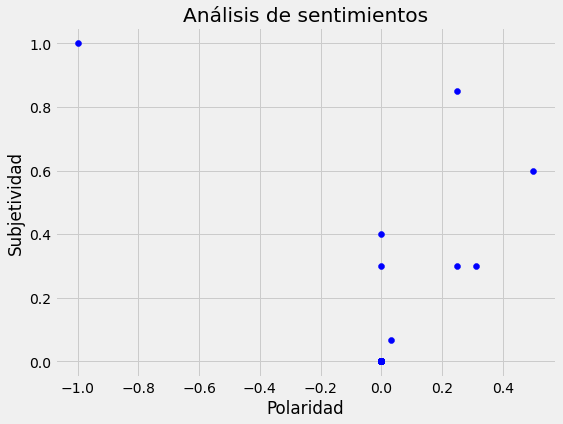

In [ ]:
plt.figure(figsize=(8,6))
for i in range(0, data.shape[0]):
  plt.scatter(data['Polaridad'][i], data['Subjetividad'][i], color='blue')

plt.title('Análisis de sentimientos')
plt.xlabel('Polaridad')
plt.ylabel('Subjetividad')
plt.show()

### Clasificar tweets segun su polaridad

In [ ]:
def analysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
data['Analysis'] = data['Polaridad'].apply(analysis)
data[['Analysis','Tweet']]

,Analysis,Tweet
0,Neutral,"@Keypo Te saluda Angie. 👋🏻 Inténtalo desde un computador 💻 y varios navegadores, si no lo logras, envíanos una image..."
1,Neutral,Lleva por lo menos tres cargadores🔌\n\nEmpaca dos cargadores para tu celular📱 uno que se quede en la habitación del ...
2,Neutral,"😁 ¡Humildad ante todo! \n\n📲 Riyad Mahrez, gana millones en el @ManCity, pero el estado de su celular causó sensació..."
3,Neutral,Últimamente tengo tantos teclazos en lo que escribo en el celular. ¿Mis dedos crecieron? ¿Las teclas en el celular s...
4,Neutral,"📱 A través del buzón de voz de tu teléfono celular, personas malintencionadas podrían robar tu información. \nSigue ..."
...,...,...
95,Neutral,Casa en Condominio residencial en Renta en zona 14\n PAC-010-03-22 \n📱 Celular: 502-5413-8957\n📧Correo:a.arriaza@cit...
96,Neutral,¿Te gustaría recibir las noticias más importantes en tu celular? 📱Únete a nuestro canal de #Telegram y se parte de l...
97,Neutral,Apartamento en Renta en el corazón de la Zona 4\n PAA-023-04-21-9 \n📱 Celular: 502-5413-6957\n📧Correo:c.porras@citym...
98,Neutral,- Paga fácilmente el parquímetro desde tu celular.🚙 \nDescarga Mueve Ciudad.📱\n👉🏻 https://t.co/vz5C2dMH7j https://t....


### Estadistica descriptiva polaridad y subjetividad

In [ ]:
data[['Polaridad','Subjetividad']].describe()

,Polaridad,Subjetividad
count,100.000000,100.000000
mean,0.003458,0.038167
std,0.121961,0.154765
min,-1.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,0.500000,1.000000


### Gráfico análisis de sentimiento

Negative:  1.0 %
Positive:  5.0 %
Neutral:  94.0 %


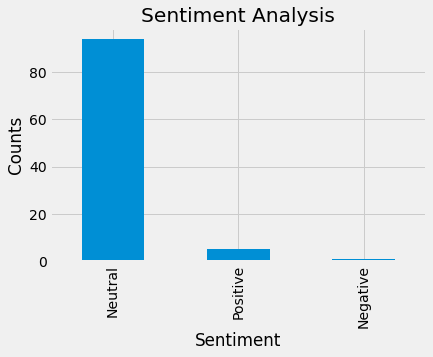

In [ ]:
ntweet = data[data.Analysis == 'Negative']
nteet = ntweet['Tweet']
print('Negative: ',round(ntweet.shape[0] / data.shape[0] * 100, 1),'%')

ptweet = data[data.Analysis == 'Positive']
pteet = ptweet['Tweet']
print('Positive: ',round(ptweet.shape[0] / data.shape[0] * 100, 1),'%')

mtweet = data[data.Analysis == 'Neutral']
mteet = mtweet['Tweet']
print('Neutral: ',round(mtweet.shape[0] / data.shape[0] * 100, 1),'%')

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
data['Analysis'].value_counts().plot(kind='bar')
plt.show()

### Preparar tweets para la nube de palabras

In [ ]:
def Texto(txt):
    txtL=''
    for word in txt:
        txtL += word.text + " "
    return txtL
data['Texto']=data['Recuperar'].apply(lambda x: Texto(x))

### Graficar nube de palabras 

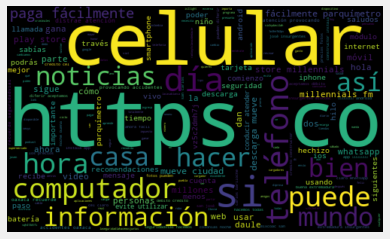

In [ ]:
all_words=' '.join( [twts for twts in data['Texto']])
word_Cloud= WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(all_words)
plt.imshow(word_Cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Eliminando signos de puntuación

In [ ]:
tweets_tidy = data
def TokenNoPunct(txt):
    words = [word for word in txt if word.isalpha()]
    return words
tweets_tidy['Token_no_punct']=tweets_tidy['TweetNoStopWords'].apply(lambda x: Minimizar(x))
tweets_tidy['Token_no_punct']=tweets_tidy['Token_no_punct'].apply(lambda x: TokenNoPunct(x)) 
tweets_tidy = tweets_tidy.explode(column='Token_no_punct') 
tweets_tidy = tweets_tidy.drop(columns='Tweet')
tweets_tidy = tweets_tidy.rename(columns={'Token_no_punct':'token'})



### Analizando frecuencia de plabaras de los tweets

In [ ]:
tweets_tidy.groupby(['Analysis','token'])['token'] \
 .count() \
 .reset_index(name='count') \
 .groupby('Analysis') \
 .apply(lambda x: x.sort_values('count', ascending=False).head(10))

Analysis         token  count
Analysis                                   
Negative 19   Negative  vickydavilah      2
         3    Negative       celular      2
         11   Negative       menores      1
         18   Negative     telefonía      1
         17   Negative       regalan      1
         16   Negative    periodista      1
         15   Negative        parece      1
         14   Negative        padres      1
         13   Negative         móvil      1
         12   Negative      modernos      1
Neutral  365   Neutral         https    103
         128   Neutral       celular     76
         685   Neutral            si     11
         385   Neutral   insurgentes      9
         536   Neutral   parquímetro      8
         224   Neutral      descarga      8
         254   Neutral           día      7
         314   Neutral         fotos      7
         745   Neutral      teléfono      6
         44    Neutral       android      6
Positive 839  Positive       celular      5
         863  Positive         https      4
         866  Positive      isllight      2
         876  Positive         manda      2
         900  Positive            si      2
         892  Positive          real      2
         911  Positive        tiempo      2
         834  Positive    aplicación      2
         880  Positive     monitorea      1
         891  Positive         quién      1

### Dataset final

In [ ]:
data

,Tweet,Token,Minimizar,Palabras_Reservadas,TweetNoStopWords,Recuperar,Lematizar,Polaridad,Subjetividad,Evaluacion,Analysis,Texto,Token_no_punct
0,"@Keypo Te saluda Angie. 👋🏻 Inténtalo desde un computador 💻 y varios navegadores, si no lo logras, envíanos una image...","[@, Keypo, Te, saluda, Angie, ., 👋🏻, Inténtalo, desde, un, computador, 💻, y, varios, navegadores, ,, si, no, lo, log...","[@, keypo, te, saluda, angie, ., 👋🏻, inténtalo, desde, un, computador, 💻, y, varios, navegadores, ,, si, no, lo, log...","[te, desde, un, y, no, lo, una, de, lo, que, te]","[@, keypo, saluda, angie, ., 👋🏻, inténtalo, computador, 💻, varios, navegadores, ,, si, logras, ,, envíanos, imagen, ...","(keypo, saluda, angie, 👋, 🏻, inténtalo, computador, 💻, varios, navegadores, si, logras, envíanos, imagen, sale, así,...","[keypo, saludo, angie, 👋, 🏻, inténtalo, computador, 💻, varios, navegador, si, lograr, envia yo, imagen, salir, así, ...",0.0,0.0,[],Neutral,keypo saluda angie 👋 🏻 inténtalo computador 💻 varios navegadores si logras envíanos imagen sale así podremos revisar 🔎,"[keypo, saluda, angie, inténtalo, computador, varios, navegadores, si, logras, envíanos, imagen, sale, así, podremos..."
1,Lleva por lo menos tres cargadores🔌\n\nEmpaca dos cargadores para tu celular📱 uno que se quede en la habitación del ...,"[Lleva, por, lo, menos, tres, cargadores🔌, Empaca, dos, cargadores, para, tu, celular📱, uno, que, se, quede, en, la,...","[lleva, por, lo, menos, tres, cargadores🔌, empaca, dos, cargadores, para, tu, celular📱, uno, que, se, quede, en, la,...","[por, lo, para, tu, uno, que, se, en, la, del, y, otro, que, con, tu, tu, es, para, la]","[lleva, menos, tres, cargadores🔌, empaca, dos, cargadores, celular📱, quede, habitación, hotel, lleves, junto, baterí...","(lleva, menos, tres, cargadores, 🔌, empaca, dos, cargadores, celular, 📱, quede, habitación, hotel, lleves, junto, ba...","[llevar, menos, tres, cargador, 🔌, empaco, dos, cargador, celular, 📱, quedar, habitación, hotel, lleves, junto, bate...",0.0,0.0,[],Neutral,lleva menos tres cargadores 🔌 empaca dos cargadores celular 📱 quede habitación hotel lleves junto batería externa 🔋 ...,"[lleva, menos, tres, empaca, dos, cargadores, quede, habitación, hotel, lleves, junto, batería, tercer, cargador, ca..."
2,"😁 ¡Humildad ante todo! \n\n📲 Riyad Mahrez, gana millones en el @ManCity, pero el estado de su celular causó sensació...","[😁, ¡Humildad, ante, todo, !, 📲, Riyad, Mahrez, ,, gana, millones, en, el, @, ManCity, ,, pero, el, estado, de, su, ...","[😁, ¡humildad, ante, todo, !, 📲, riyad, mahrez, ,, gana, millones, en, el, @, mancity, ,, pero, el, estado, de, su, ...","[ante, todo, en, el, pero, el, estado, de, su, en, por, qué]","[😁, ¡humildad, !, 📲, riyad, mahrez, ,, gana, millones, @, mancity, ,, celular, causó, sensación, internet📱, checa, 📹...","(😁, humildad, 📲, riyad, mahrez, gana, millones, mancity, celular, causó, sensación, internet, 📱, checa, 📹, https, //...","[😁, humildad, 📲, riyad, mahrez, ganar, millón, mancity, celular, causar, sensación, internet, 📱, checo, 📹, https, //...",0.0,0.0,[],Neutral,😁 humildad 📲 riyad mahrez gana millones mancity celular causó sensación internet 📱 checa 📹 https //t.co atp0nljosm h...,"[riyad, mahrez, gana, millones, mancity, celular, causó, sensación, checa, https, https]"
3,Últimamente tengo tantos teclazos en lo que escribo en el celular. ¿Mis dedos crecieron? ¿Las teclas en el celular s...,"[Últimamente, tengo, tantos, teclazos, en, lo, que, escribo, en, el, celular, ., ¿Mis, dedos, crecieron, ?, ¿Las, te...","[últimamente, tengo, tantos, teclazos, en, lo, que, escribo, en, el, celular, ., ¿mis, dedos, crecieron, ?, ¿las, te...","[tengo, en, lo, que, en, el, en, el, son, más, no, pero, ya, estoy, algo]","[últimamente, tantos, teclazos, escribo, celular, ., ¿mis, dedos, crecieron, ?, ¿las, teclas, celular, pequeñas, ?, ...","(últimamente, tantos, teclazos, escribo, celular, mis, dedos, crecieron, las, teclas, celular, pequeñas, sé, harto, ...","[últimamente, 